In [10]:
import rasterio
import pprint
import fiona
import matplotlib.pyplot as plt
import numpy as np
from descartes import PolygonPatch
from fiona import collection
import geopandas as gpd
from rasterio import features
from rasterio import mask
import json
import earthpy as et 
import earthpy.plot as ep
import earthpy.spatial as es
import cartopy as cp
from rasterio.plot import show
from shapely.geometry import mapping



from mpl_toolkits.axes_grid1 import make_axes_locatable


In [11]:
dataset = rasterio.open('nsrdbv3_dni/Monthly DNI/dni_aug.tif')

In [12]:
dataset

<open DatasetReader name='nsrdbv3_dni/Monthly DNI/dni_aug.tif' mode='r'>

In [13]:
dataset.xy(dataset.height // 2, dataset.width // 2)

(-101.17999999999999, 19.489999999999995)

In [14]:
dataset.crs

CRS.from_epsg(4326)

In [15]:
dataset

<open DatasetReader name='nsrdbv3_dni/Monthly DNI/dni_aug.tif' mode='r'>

In [17]:
{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}

{1: 'float64'}

In [22]:
band1 = dataset.read(1)
band = dataset.read(masked=True)[0]

In [28]:
band1.shape
print(np.max(band1))
print(np.min(band1))
extent = rasterio.plot.plotting_extent(dataset)
print(dataset.profile)

446.0972340124505
-9999.0
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': -9999.0, 'width': 3940, 'height': 2025, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.04, 0.0, -180.0,
       0.0, -0.04, 59.99), 'tiled': False, 'interleave': 'band'}


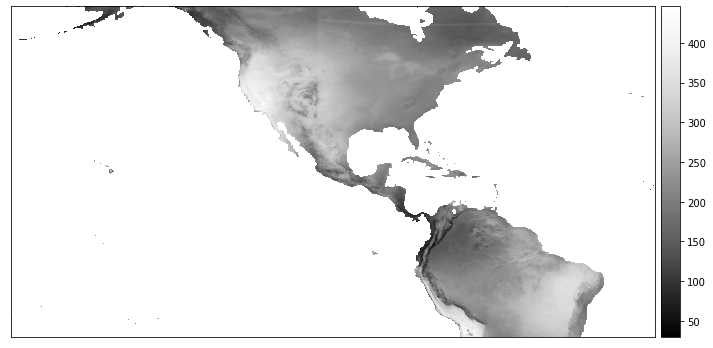

<AxesSubplot:>

In [32]:
ep.plot_bands(band, extent=extent)

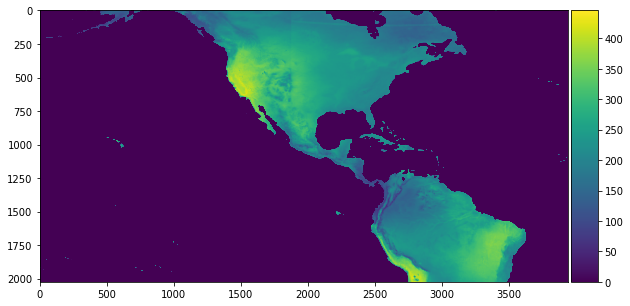

In [95]:
def imshow_colorbar(data):
    plt.figure(figsize=(10,10))
    ax = plt.gca()
    im = ax.imshow(data, vmin=0)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    plt.colorbar(im, cax=cax)
imshow_colorbar(band1)

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')


<AxesSubplot:>

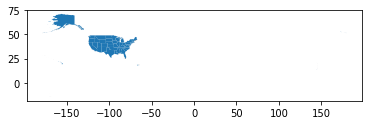

In [40]:
shapefile = gpd.read_file("cb_2018_us_state_500k/cb_2018_us_state_500k.shp")
print(shapefile.keys())
shapefile.plot()

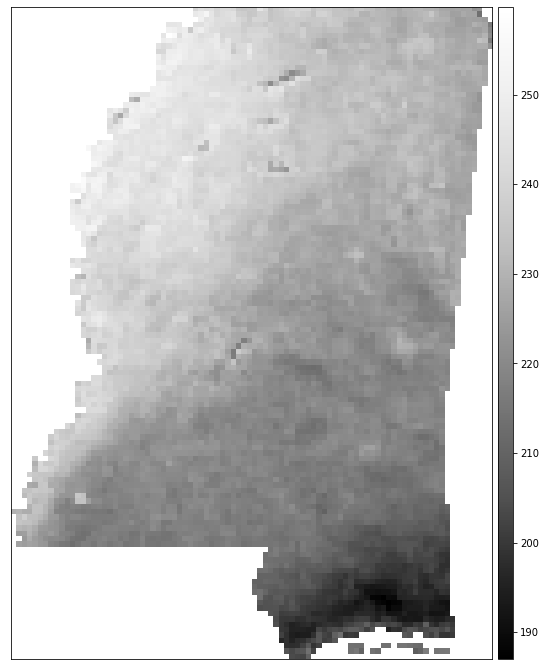

<AxesSubplot:>

In [103]:
MS = shapefile.geometry[0]
cropd, crop_meta = es.crop_image(dataset, MS)
cropd_ma = np.ma.masked_equal(cropd[0], -9999.0)
ep.plot_bands(cropd_ma)

226.9594997824464


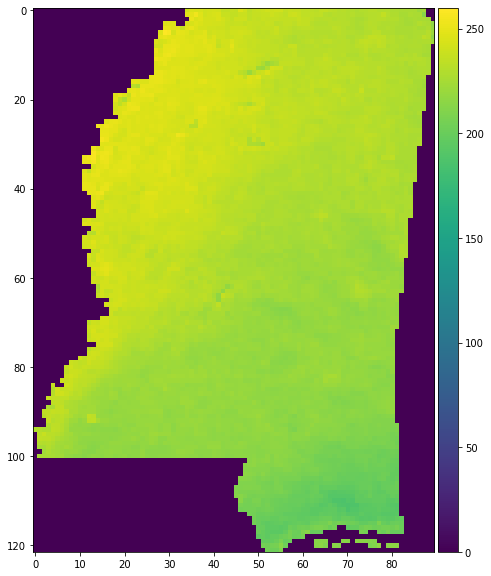

In [102]:
invmask = ~cropd_ma.mask
imshow_colorbar(cropd_ma.data)
print(np.mean(cropd_ma.data[invmask]))

AxesSubplot(0.170041,0.406466;0.657977x0.192068)


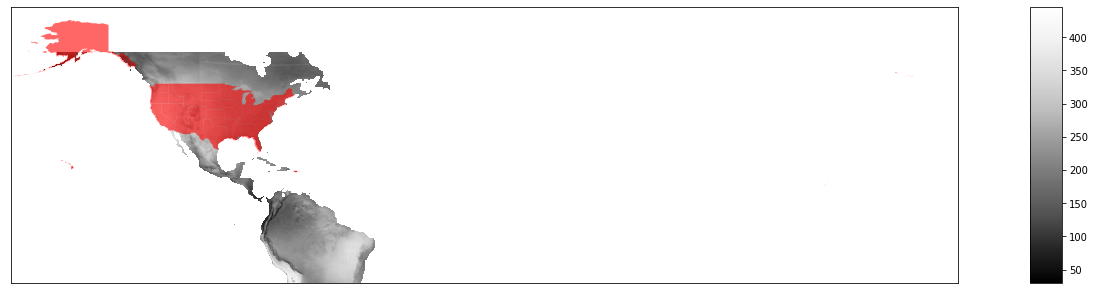

In [38]:
fig, ax = plt.subplots(figsize=(20, 20))
ep.plot_bands(band, extent=extent, ax=ax)
shapefile.plot(ax=ax, alpha = .6, color='r')
print(ax)